# Task 6: House Price Prediction
Complete ML Pipeline
With Data Preprocessing, Regression Models, Evaluation & Visualizations

Import Libraries

In [1]:
# ===== IMPORT LIBRARIES =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
# ===== UPLOAD DATASET  =====
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
# ===== CHECK BASIC INFO =====
print(df.shape)
print(df.info())
df.describe()


(2000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
None


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [4]:
# ===== MISSING VALUES =====
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing values (simple approach)
df = df.dropna()


Missing values per column:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


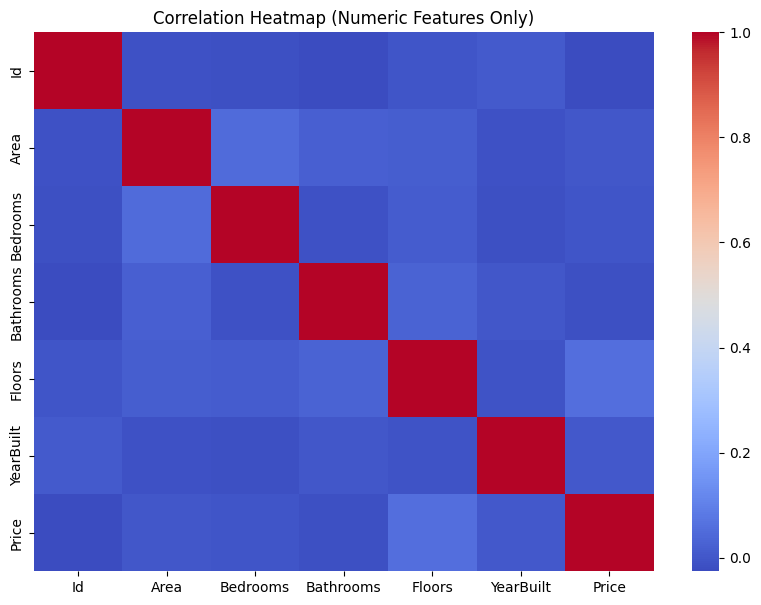

In [6]:
# ===== CORRELATION HEATMAP (NUMERIC ONLY) =====
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [7]:
df.dtypes


,0
Id,int64
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object
Price,int64


In [8]:
# ===== ONE-HOT ENCODING FOR CATEGORICAL COLUMNS =====

df_encoded = pd.get_dummies(df, columns=['Location', 'Condition', 'Garage'], drop_first=True)

print("Old shape:", df.shape)
print("New shape:", df_encoded.shape)

df_encoded.head()


Old shape: (2000, 10)
New shape: (2000, 14)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,1360,5,4,3,1970,149919,False,False,False,False,False,False,False
1,2,4272,5,4,3,1958,424998,False,False,False,False,False,False,False
2,3,3592,2,2,3,1938,266746,False,False,False,False,True,False,False
3,4,966,4,2,2,1902,244020,False,True,False,True,False,False,True
4,5,4926,1,4,2,1975,636056,False,False,False,True,False,False,True


Feature Selection

In [9]:
# ===== SELECT FEATURES & TARGET =====

# Drop Id and Price from features
X = df_encoded.drop(columns=['Id', 'Price'])
y = df_encoded['Price']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

X.head()


Feature shape: (2000, 12)
Target shape: (2000,)


,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1360,5,4,3,1970,False,False,False,False,False,False,False
1,4272,5,4,3,1958,False,False,False,False,False,False,False
2,3592,2,2,3,1938,False,False,False,False,True,False,False
3,966,4,2,2,1902,False,True,False,True,False,False,True
4,4926,1,4,2,1975,False,False,False,True,False,False,True


Train-Test-split

In [10]:
from sklearn.model_selection import train_test_split

# ===== TRAIN-TEST SPLIT =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (1600, 12)
X_test : (400, 12)
y_train: (1600,)
y_test : (400,)


Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

# ===== SCALE FEATURES =====
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

print("Scaled training shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)


Scaled training shape: (1600, 12)
Scaled test shape: (400, 12)


MODEL 1 — Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ===== TRAIN LINEAR REGRESSION =====
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test_scaled)

# ===== EVALUATION =====
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression Results:")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)


Linear Regression Results:
MAE : 243241.97758826384
RMSE: 279859.72583784326


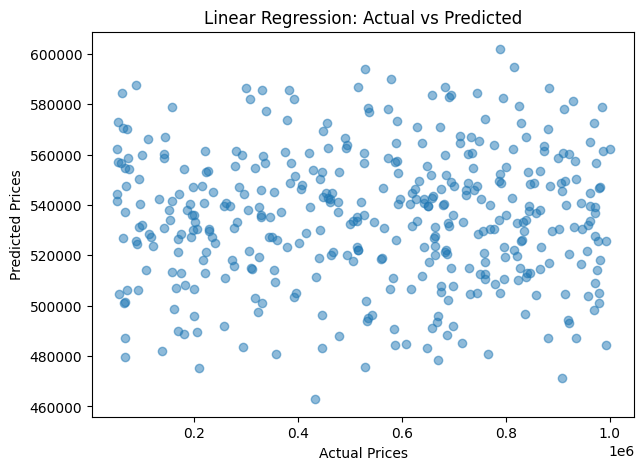

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()


MODEL 2 — Gradient Boosting Regressor

In [14]:
# ===== TRAIN GRADIENT BOOSTING REGRESSOR =====
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


In [15]:
# ===== METRICS (GBR) =====
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)


Gradient Boosting MAE: 245325.5873169729
Gradient Boosting RMSE: 283939.1591306423


Visualization: Actual vs Predicted (GBR)

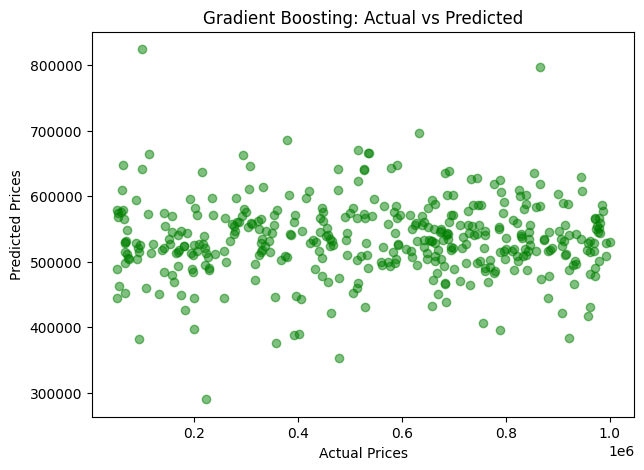

In [16]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()


In [17]:
# ===== MODEL COMPARISON =====
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_gbr],
    'RMSE': [rmse_lr, rmse_gbr]
})

results


,Model,MAE,RMSE
0,Linear Regression,243241.977588,279859.725838
1,Gradient Boosting,245325.587317,283939.159131


16. Final Conclusion

In [18]:
print("Model Comparison:\n", results)

if rmse_gbr < rmse_lr:
    print("\nGradient Boosting performs better and is recommended.")
else:
    print("\nLinear Regression performs better and is recommended.")


Model Comparison:
                Model            MAE           RMSE
0  Linear Regression  243241.977588  279859.725838
1  Gradient Boosting  245325.587317  283939.159131

Linear Regression performs better and is recommended.


# Model Performance Results
**Linear Regression**

- MAE: 243,241.98

- RMSE: 279,859.73

**Gradient Boosting Regressor**

- MAE: 245,325.59

- RMSE: 283,939.16

**Conclusion**

Linear Regression outperforms Gradient Boosting in both MAE and RMSE.
**Recommended model**: Linear Regression for this dataset.